In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import model_api as api
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# This is CPU tensorflow if 0 GPUs


Num GPUs Available:  0


In [2]:
x_train, y_train, x_test, y_test = api.get_standard_data()    

In [3]:
# Analyze shape of inputs
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("\nShape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

'''
The category labels are sparsely labeled instead of using a one-hot vector.
This will be accounted for in the design on the neural network optimizer. 
'''

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)

Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


'\nThe category labels are sparsely labeled instead of using a one-hot vector.\nThis will be accounted for in the design on the neural network optimizer. \n'

In [4]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=100, val_split=0.1):
    # Train the neural network model 
    # Include validation split (optional)... this is outside the test_set!
    # We may use this for K-crossfold validation if we want to really test a model
    train_hist = model.fit(x=x_train, y=y_train, validation_split=val_split, epochs=epochs)
    test_result = model.evaluate(x=x_test, y=y_test)

    return train_hist, test_result

# Initialize Neural Network
NN_model = api.NN_classifier(32, 2, verbose=True)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
train_hist, test_result = train_model(NN_model, x_train, y_train , x_test, y_test, epochs=100, val_split=0.1)

Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1359 - accuracy: 0.9610 - val_loss: 0.1218 - val_accuracy: 0.9670
Epoch 2/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1289 - accuracy: 0.9630 - val_loss: 0.1239 - val_accuracy: 0.9662
Epoch 3/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1226 - accuracy: 0.9651 - val_loss: 0.1167 - val_accuracy: 0.9680
Epoch 4/100
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1171 - accuracy: 0.9672 - val_loss: 0.1138 - val_accuracy: 0.9687
Epoch 5/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1117 - accuracy: 0.9685 - val_loss: 0.1103 - val_accuracy: 0.9703
Epoch 6/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9699 - val_loss: 0.1084 - val_accuracy: 0.9690
Epoch 7/100
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1023 - accuracy: 0.9709 - val_loss: 0.1076 - val_ac

In [18]:
# Plot loss history
import matplotlib.pyplot as plt
import seaborn as sns

def show_results(train_hist, test_result, model_name="model"):
    loss_hist = train_hist.history['loss']
    val_loss_hist = train_hist.history['val_loss']
    acc_hist = train_hist.history['accuracy']
    val_acc_hist = train_hist.history['val_accuracy']

    plt.plot(loss_hist, label="Training Loss")
    plt.plot(val_loss_hist, label="Validation Loss")
    plt.title(f"Categorical Cross Entropy Loss History of {model_name}.")
    plt.legend()
    plt.show()

    plt.plot(acc_hist, label="Training Accuracy")
    plt.plot(val_acc_hist, label="Validation Accuracy")
    plt.title(f"Accuracy History of {model_name} on Training Set.")
    plt.legend()
    plt.show()

    print(f"Categorical Cross Entropy Loss of {model_name} on Test Set: ", test_result[0])
    print(f"Accuracy of {model_name} on Test Set: ", test_result[1])

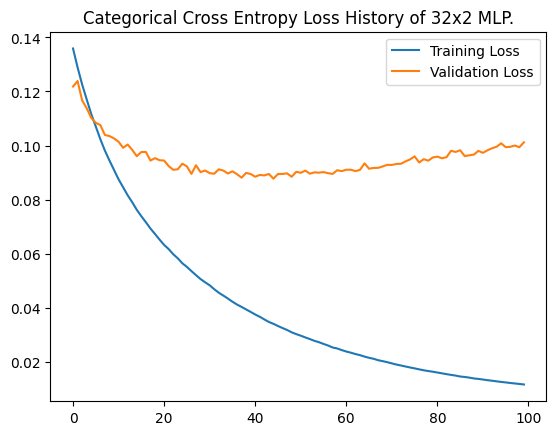

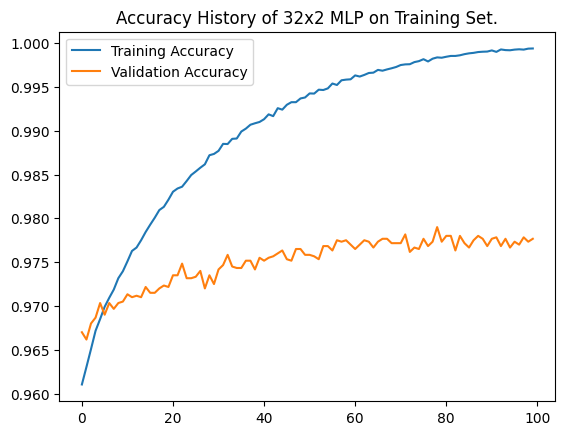

Categorical Cross Entropy Loss of 32x2 MLP on Test Set:  0.10070580989122391
Accuracy of 32x2 MLP on Test Set:  0.973800003528595


In [19]:
show_results(train_hist, test_result, model_name="32x2 MLP")

In [20]:
CNN_model = api.CNN_classifier(16, 4, verbose=True)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                          

In [24]:
train_hist, test_result = train_model(CNN_model, x_train, y_train , x_test, y_test, epochs=25, val_split=0.1)

Epoch 1/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0603 - val_accuracy: 0.9840
Epoch 2/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0486 - accuracy: 0.9856 - val_loss: 0.0559 - val_accuracy: 0.9852
Epoch 3/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0546 - val_accuracy: 0.9855
Epoch 4/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0555 - val_accuracy: 0.9855
Epoch 5/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 6/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.0528 - val_accuracy: 0.9858
Epoch 7/25
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0383 - accuracy: 0.9885 - val_loss: 0.0539 - val_ac

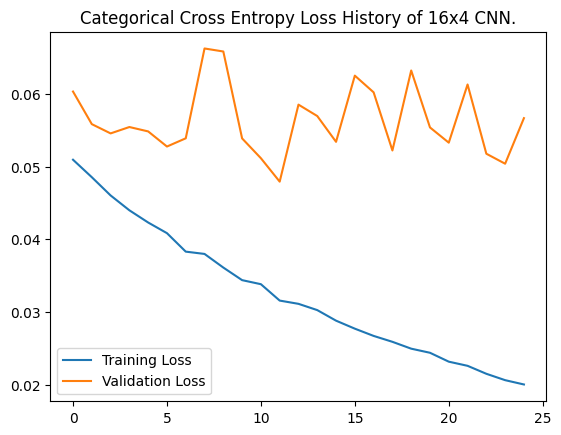

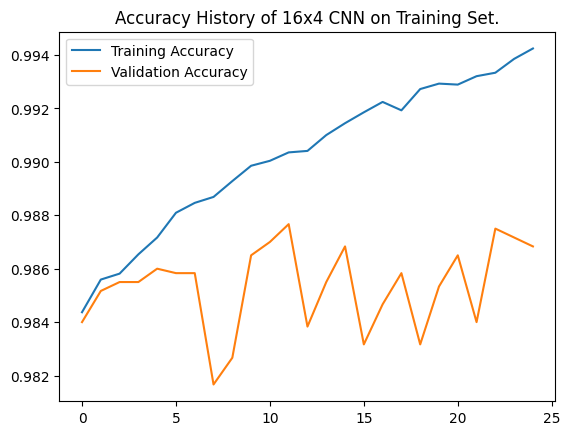

Categorical Cross Entropy Loss of 16x4 CNN on Test Set:  0.050786036998033524
Accuracy of 16x4 CNN on Test Set:  0.9855999946594238


In [25]:
show_results(train_hist, test_result, model_name="16x4 CNN")